# 0. 1차시 간단 복습!

## 시계열 데이터란?
- 순차적인 시간의 흐름에 따라 수집된 데이터
- 연속한 관측치는 서로 상관관계가 존재하며, 순서가 중요한 "시퀀스 데이터"로 간주됨

> 핵심 질문: 과거 데이터가 미래에 어떤 영향을 미치는가?

## 단변량 시계열 & 다변량 시계열
1. 단변량 시계열
- 시간에 따라 연속적으로 측정된 단일 변수로 이루어진 시계열 데이터
2. 다변량 시계열
- 같은 시간에 기록된 둘 이상의 변수로 이루어진 시계열 데이터
- 변수 간 상호 작용 및 영향력 파악

## 시계열 데이터의 특징
1. 시간 의존성
- 시계열 데이터는 시간에 따라 변화한다.
2. 계절성 & 추세
- 시간에 따라 장기적으로 증가/감소하는 추세 + 일정 주기로 반복되는 패턴
3. **자기 상관성**
- 이전 시점의 값이 이후 시점의 값에 영향을 미친다
- 즉, 자기자신끼리 상관관계를 갖는 특성
- 이것 때문에 시계열에서 회귀를 못 쓴다!(오차항 간의 상관관계 존재)

## 시계열 데이터의 분석 요인
1. 추세 요인 (Trend Factor)
- 데이터 전반에 걸쳐 시간에 따라 지속적으로 증가/감소하는 경향
2. 순환 요인 (Cycle Factor)
- 계절성보다 더 길고 불규칙한 주기로 반복되는 변동
3. 계절 요인 (Seasonal Factor)
- 일정한 주기 (계절, 월, 요일 등 정기적인 주기)로 반복되는 패턴
4. 불규칙 요인 (Irregular Factor)
- 추세, 계절성, 순환성을 모두 제거한 뒤 남은 예측 불가능한 변동

## 시계열 분석의 기본 프로세스
1. 데이터 전처리 : 결측치 보간, 이상치 제거, 요소분해
2. 정상성 판단
- 정상성이란?
    - 시간에 상관없이 일정한 성질을 나타내는 것
    - 정상성 O -> 안정적 시계열
    - 정상성 X -> 불안정 시계열
- 정상/비정상 시계열 여부 판단
    - 단위근 검정 사용 (ADF, KPSS 등)
    - 비정상이면 -> 다음 단계 수행
- 비정상 유형에 따라 정상성 확보
    - 추세 있다면 -> 차분 수행
    - 계절성 있다면 -> 계절 차분
    - 분산 변화 있다면 -> 로그 변환, Box-Cox 변환
    - 👉 정상성 확보 후 다음 단계 수행
3. 모델링 및 예측 <- 시계열2에서 다룰 내용
- 정상성 확보 후 어떤 프로세스를 따르는지에 따라 모델링
    - 정상성이 확보되면, 시계열의 구조에 맞게 모델을 적용

# Intro
1. 전통적 통계 모델
    - 단변량 시계열
        - 안정적(정상성 O) 시계열
            - 모델: 자기 회귀 모델 (AR), 이동 평균 모델 (MA), ARMA
        - 불안정(정상성 X) 시계열
            - 정상성 X → 정상성을 갖춘 안정적 시계열로 바꿔주는 과정이 필수적!
            - 모델: ARIMA, SARIMA
    - 다변량 시계열
        - 모델: VAR
2. 딥러닝을 활용한 시계열 분석
    - RNN
    - Transformer 기반
    - Foundation 모델

# 1. 단변량 시계열 분석
## 1.1 안정적 시계열 분석

### 1. 자기 회귀 모델 (Autoregressive Model, AR)
- 예시 : 올해 크리스마스 몇 도일까? -> 1년 전 크리스마스 온도 어땠지? 생각
- 이렇게 과거 '자기 자신 데이터(온도)'가 미래 값을 설명해줄 것이라고 가정하는 것이 자기 회귀!
#### 자기 회귀
- 과거 자신의 값들을 독립변수(x)로 삼아 현재 값(y)을 예측하는 회귀
    - 시계열 데이터의 '자기상관성'을 활용
    - 자기상관성: 이전 시점의 값이 이후 시점에 영향을 미침
$$
AR(p):  y_{t}=c +\phi _1y_{t-1}+\phi_2y_{t-2}+...+\phi _py_{t-p}+\varepsilon _t
$$
- $AR(p)$
    - p차 자기 회귀 모형
    - 과거 p개 시점의 데이터의 선형 조합을 이용해 예측하는 모델
        - 선형 회귀식에서 x가 들어갈 자리에 예측할 값(y)의 과거 값들 ($y_{t-n}$)이 들어가게 된다.
$$
AR(1):  y_{t}=c +\phi_1y_{t-1}+\varepsilon _t
$$
- y의 값은 1 시점 이전의 y값($y_{t-1}$)의 영향을 받는다
- 데이터의 특성에 따라 1 시점 이전은 1년 전 or 1일 전 or 1시간 or 1초전 이 될 수 있다!

- 올해 크리스마스 기온이 1년 전 크리스마스 기온의 영향을 받을 것을 표현한 통계식이라면..
    - - $y_t$: 올해 크리스마스의 기온
    - $y_{t-1}$: 작년 크리스마스의 기온
    - $\phi_1$: 작년 기온이 올해 기온에 영향을 미치는 정도
- 작년, 재작년 기온의 영향도 받을 것 같다면 -> AR(2), AR(3)의 식으로 표현 가능
---
> OLS 회귀 vs AR(p) 모형
1. OLS 회귀
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \varepsilon
$$
- 목적: 현재 주어진 x가 y에 어떤 영향을 미치는지 설명하는 것
- 예측도 할 수 있지만, 설명력(해석력) 중심
- 예측 범위는 보통 현재 관측된 X값 근처에서만 유효
- OLS 회귀에서의 시계열 예측: 예측값을 또 예측에 사용하여 예측이 부정확해지고, 따라서 OLS회귀는 시계열 예측에 적합하지 않다
2. AR 모형
- 자체가 시계열 예측용 모델이라, 예측값을 사용하는 구조가 모델 설계에 포함됨
- MLE(최우도추정) 기반으로 파라미터($\phi$)를 추정

### 2. 이동 평균 모델 (Moving Average, MA)
- 평활화 기법인 이동평균(MA)과는 이름만 같을 뿐 전혀 다른 개념이다!
> "어제 밤을 새서 오늘 술 많이 못 마셔"
- 이때, 어제의 충격(밤샘)이 오늘의 결과(주량)에 영향을 준다고 가정하는 것이 바로 이동 평균의 핵심!
- 이동 평균 모델이란, 과거 시점의 잔차($\varepsilon$)를 독립변수로 삼아 현재 값을 예측하는 모델
    - 과거의 잘못 예측한 것(예측 오차, 충격)을 현재 시점에 반영
    - 잔차($\varepsilon$) = 실제 값과 예측 값의 차이
        - 잔차들은 모두 백색잡음 & 서로 독립적
$$
MA(q): y_t = \mu +\varepsilon _t+ \theta _1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+...+\theta_q\varepsilon_{t-q}
$$
- MA(q)
    - q차 이동 평균 모형
    - 과거 q개의 예측 오차의 선형 결합으로 예측하는 모델
        - 선형 회귀식에서 x가 들어갈 자리에 예측할 값(y)의 과거 오차들($\varepsilon_{t-n}$)이 들어가게 된다

$$
MA(1):  y_{t}=\mu +\varepsilon _t+ \theta _1\varepsilon_{t-1}
$$
- y의 현재 값($y_t$)은 1 시점 이전의 오차($\varepsilon_{t-1}$)의 영향을 받는다
- 오늘의 주량이 어제의 밤샘 충격(예측 오차)에 영향을 받을 것을 표현한 통계식이라면
    - $y_t$: 오늘의 주량
    - $\mu$: 평소 주량
    - $\varepsilon_{t-1}$: 어제(1일 전) 밤샘이라는 충격
    - $\theta _1$: 충격이 영향을 미치는 정도

### 3. AR, MA 모델의 전제 조건
- AR과 MA모델을 적용하기 위해서는 데이터의 특성과 모델 구조의 안정성을 고려해야 함
#### 1. 정상성
- AR과 MA 모형은 안정적 시계열 분석으로 확률적 안정성을 전제로 추정 -> 정상성을 만족해야 함
- AR 모형의 정상성 조건
    - 특성 방정식: $1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p = 0$
    - 모든 해(z)의 절댓값 > 1 -> AR의 정상성 확보
    - 보통은 AR(1), AR(2)까지만 활용하므로, 이 경우의 조건만 알아도 충분
        - AR(1)의 조건: $|\phi|<1$
        - AR(2)의 조건  
            $\lambda^2 - \phi_1\lambda - \phi_2 = 0$ (특성방정식)에서  
            특성방정식의 근이 $\lambda_1, \lambda_2$일 때, $|\lambda_1|<1, |\lambda_2|<1$  
- MA 모형의 정상성 조건
    - 잔차(<-> 백색 잡음)들은 정상성을 이미 만족하기 때문에 잔차들의 조합으로 이뤄진 MA 모형도 항상 정상성을 만족!

> ADF, KPSS(단위근 검정)는 데이터의 정상성을 파악하는 방법임, '모델'의 정상성을 확보하기 위해서는 특성방정식이 필요함!

#### 2. 가역성
- 가역성이란?
    - MA 모형을 AR(∞) 형태로 재표현할 수 있는지 여부
    - → $\varepsilon_t$ 를 $y_t$, $y_{t-1}$, … 로 다시 표현할 수 있는가
    - 이 성질이 없으면 같은 시계열을 여러 MA 모델이 만들어낼 수 있어 모델이 유일하지 않다.
- MA 모형에서는 t 시점의 값을 과거 시점의 오차항 $\varepsilon$으로 표현
    - 안정적이려면 모델의 유일성이 보장되어야 함!
    - 오차항$\varepsilon$도 과거 관측값($y_{t-n}$)으로 표현할 수 있어야 안정적!
    - 정리: MA는 원래 '오차->관측값' 방향이지만 분석과 추정을 위해서 '관측값->오차'방향도 필요하고, 이 표현이 가능해야 모델이 안정적이고 해석 가능함, 이것이 가역성!

- AR 모형의 가역성 만족 조건?
    - AR 모형은 처음부터 AR형태로 표현되어 있기 때문에 가역성 체크할 필요 X
- MA 모형의 가역성 만족 조건
    - 특성 방정식: $1 + \theta_1 z + \cdots + \theta_q z^q = 0$
    - 모든 해의 절댓값 > 1 ⇒ MA의 가역성 확보

### 4. ARMA (Autoregressive Moving Average) 모형
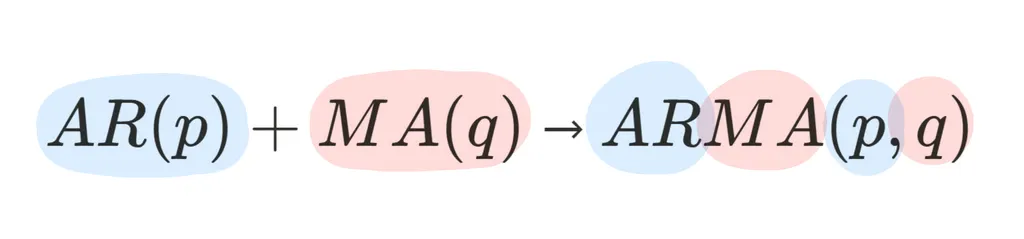  
$Y_t = \underbrace{\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p}}_{\text{AR(p): 자기회귀}} $
$+ \underbrace{\varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}}_{\text{MA(q): 이동평균}}$  
- AR(p)모형과 MA(q)모형을 결합한 모형
    - 과거 p개의 관측값 + 과거 q개의 오차 를 활용해서 예측하는 방법
    - 조건: AR(p) 모형의 정상성 + MA(q) 모형의 가역성 -> 이 둘의 조건 모두 만족해야 함
- ARMA 모형의 특수한 경우
    - ARMA(p,0) : AR(p)와 동일!
    - ARMA(0,q) : MA(q)와 동일!
    - ARMA(0,0) : 백색 잡음 모델($y_t = \varepsilon_t$)과 동일!

### 5. 차수 결정 방법: 자기 상관 함수
- 두 그래프를 통해 현재 값이 과거 값과 어떤 관계가 있는지 파악하고 이를 통해 AR, MA, ARMA의 적절한 차수(p,q)를 결정

#### 자기 상관 계수 (Auto Correlation Function, ACF)
- ARMA(p,q)모형에서 사용할 q개의 오차 결정 방법
- 두 시점 사이의 상관 관계 파악 (간접 영향까지 모두 파악)
$$
ACF(k) = \text{Corr}(y_t, y_{t-k})
$$
- 시차(lag) k에 대해서, 두 관측치 간의 상관 관계를 나타내는 함수
- k = 3 일 때,
    -  $y_{t}$와 $y_{t-3}$  사이의 상관계수를 구한다(직접적 영향 + t-2, t-1 시점의 y값을 통해 영향을 주는 간접적 영향까지 모두 반영됨)
- ACF(k)에서 그래프의 x축 = k(시차), y축 = ACF(k) 값

#### 부분 자기 상관 계수 (Partial Autocorrelation Function, PACF)
- ARMA(p,q)모형에서 사용할 p개의 시점 결정 방법
- 두 시점 사이의 직접적인 영향만 파악

$e_t = y_t - (\beta_1y_{t-1} + ... + \beta_{k-1}y_{t-(k-1)})$일 때, 

$$
PACF(k) = Corr(e_t, e_{t-k})
$$
- 시차 k에 대해서, 두 시점 사이의 직접적 상관 관계를 나타내는 함수(간접적 영향 제외, ex. 단,  $y_{t}$와 $y_{t-3}$를 계산할 땐, $y_{t-1}$, $y_{t-2}$의 영향은 제한한다)
- PACF(k)에서 그래프의 x축 = k(시차), y축 = PACF(k) 값

#### ACF와 PACF로 차수 및 모형 결정하기

|  | **ACF 그래프** 모습 | **PACF 그래프** 모습 |
| --- | --- | --- |
| **AR(p) (= ARMA(p, 0))사용**해야 할 때 | 천천히 감소 or 진동 감소 | p+1 시점부터 0에 근접 |
| **MA(q) (= ARMA(0, q))사용**해야 할 때 | q+1 시점부터 0에 근접 | 천천히 감소 or 진동 감소 |
| **ARMA(p, q) 사용**해야 할 때 | q+1 시점부터 0에 근접 | p+1 시점부터 0에 근접 |

- 그래프 의미
    - AR(p) 모형
        - **ACF : 천천히 감소 or 진동 감소**
            
            ← AR 모델은 과거 **값**이 계속 영향, 현재의 값이 **여러 시차의 과거 값과 약하게 연결**

        - **PACF : p+1 시점부터 0으로 절단**

            ← **시점 p까지만의 과거만이 현재에 영향**을 주고 그 이후 시차는 더 이상 직접적인 영향 X
            
    - MA(q) 모형
        - **ACF: q+1 시점부터 0으로 절단**
            
            ← MA(q)에서는 q시점까지만 오차항 공유 → 상관 있음 → q+1부터는 공유 오차항 없음 → 상관 0
            
        - **PACF: 천천히 감소 or 진동 감소**
            
            ← *현재값 = 과거 **오차항**의 조합* 이므로, 오차항들이 만들어내는 간접 상관이 존재, 멀리 떨어진 시점 간에도 상관성 존재

- 차수 및 모형 결정하기
1. AR(1)일 때
- 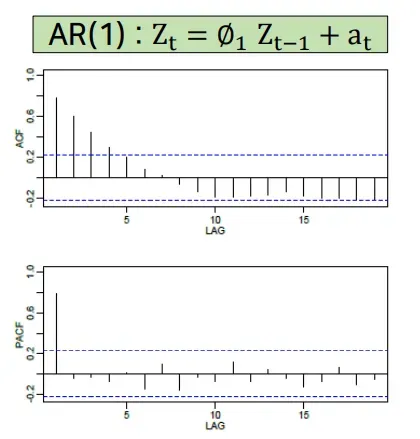
- 적절한 차수: p=1, q=0
- ARMA(1,0), 즉 AR(1) 모형으로 결정!
2. MA(1)일 때
- 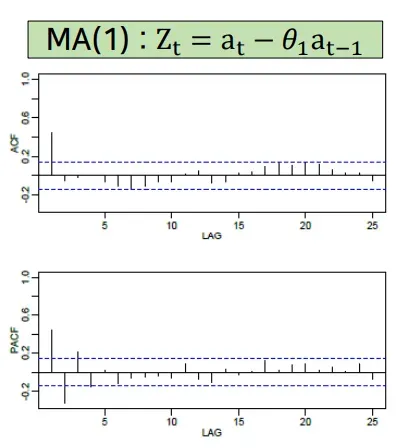
- 적절한 차수: p=0, q=1
- ARMA(0,1), 즉 MA(1) 모형으로 결정!
3. ARMA(1,1)일 때
- 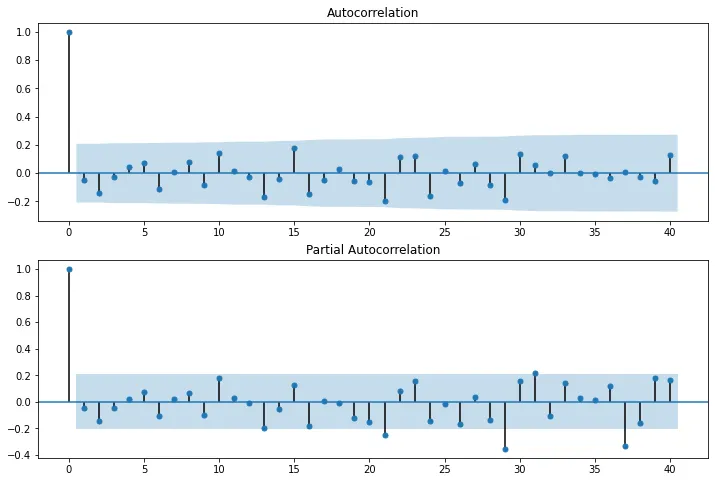
- 적절한 차수: p=1, q=1
- ARMA(1,1) 모형으로 결정!


## 1.2 불안정 시계열
- 불안정한 데이터의 시계열 분석 프로세스
1. 비정상 시계열 데이터 (추세 or 계절성 존재)
2. 정상성 확보 (차분 or 계절성 차분)
3. 정상 시계열
4. ARMA를 사용해 안정적 시계열 분석

-> 불안정 시계열 모델은 안정적 시계열 모델(ARMA)에 정상성 확보 과정(차분, 계절성 차분)이 추가된 형태!

### 1. ARIMA (Autoregressive Integrated Moving Average)
- 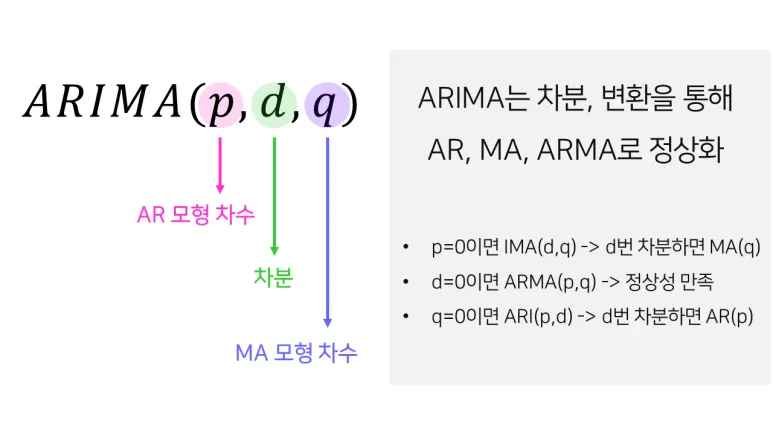
$$
ARMA(p, q) + \text{차분} \rightarrow ARIMA(p,d,q)
$$
- ARIMA 모형의 특수한 경우

| 1. 백색잡음 | ARIMA(0,0,0) |
| --- | --- |
| 2. 자기회귀 | ARIMA(p,0,0) ⇔ AR(p) |
| 3. 이동평균 | ARIMA(0, 0, q) ⇔ MA(q) |
| 4. 랜덤워크 | 상수가 없는 ARIMA(0,1,0) |
| 5. 표류를 포함하는 랜덤워크 | 상수가 있는 ARIMA(0,1,0) |

> 표 보충 설명
4. 랜덤워크 (ARIMA(0,1,0) - 상수가 없는 경우)
$$
Y_t = Y_{t-1} + \varepsilon_t
$$
- 이전 값에 무작위 충격(백색 잡음)만 더해져 예측 불가, 방향성이 존재 X
5. 표류를 포함하는 랜덤워크(random walk with drift) (ARIMA(0,1,0) - 상수가 있는 경우)
$$
Y_t = Y_{t-1} + \varepsilon_t + c
$$
- 랜덤워크 모델에 상수항(c)이 추가된 모델의 형태
- 상수항의 영향으로, 방향성 존재
---
### 2. SARIMA (Seasonal ARIMA)
- 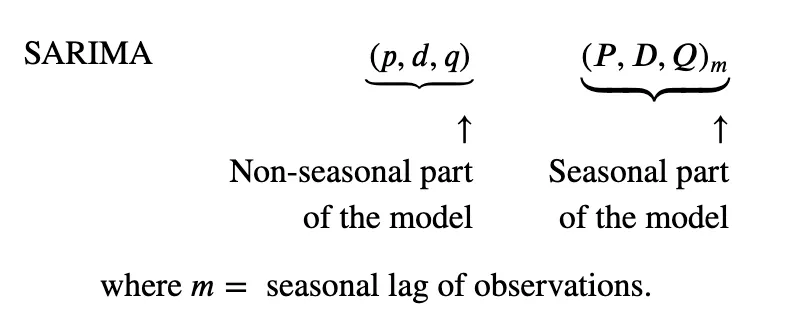
$$
ARIMA(p,d,q) + \text{계절성(Seasonal) 차분} \\ \rightarrow SARIMA(p,d,q)(P, D, Q)_m
$$
- 시계열 데이터의 계절성을 처리할 수 있는 모델
- ARIMA 모델에 계절성 변동을 반영한 모델

- 하이퍼파라미터
    - $(p, d, q)$: 비계절 ARIMA 파라미터
        - $p$ → AR의 차수
        - $d$ → 차분의 정도
        - $q$ → MA의 차수
    - $(P, D, Q)$: 계절 ARIMA 파라미터
        - $P$ → 계절성 AR의 차수
        - $D$ → 계절성 차분의 정도
        - $Q$ → 계절성 MA의 차수
    - $m$: 계절성 주기의 길이
        - 예시) 12(개월), 7(일), 4(개월) ..

> 예시: 올해 12월 호빵 판매량 예측
- 호빵 판매량 데이터
    - 월 별 데이터라고 가정
    - → 데이터의 시점 단위: 개월
    - 호빵은 여름엔 판매량이 감소하고, 겨울엔 판매량이 증가하는 매년 일정한 주기를 보임
    - → 호빵 데이터의 계절성 주기: 12(개월) → m=12

- 호빵 데이터에 대해 적절한 하이퍼파라미터를 구해보았더니 아래와 같은 식이 나왔습니다
$$
SARIMA\underbrace{(1,1,1)}_\text{비계절}\underbrace{(1,1,1)_{12}}_\text{계절}
$$
- 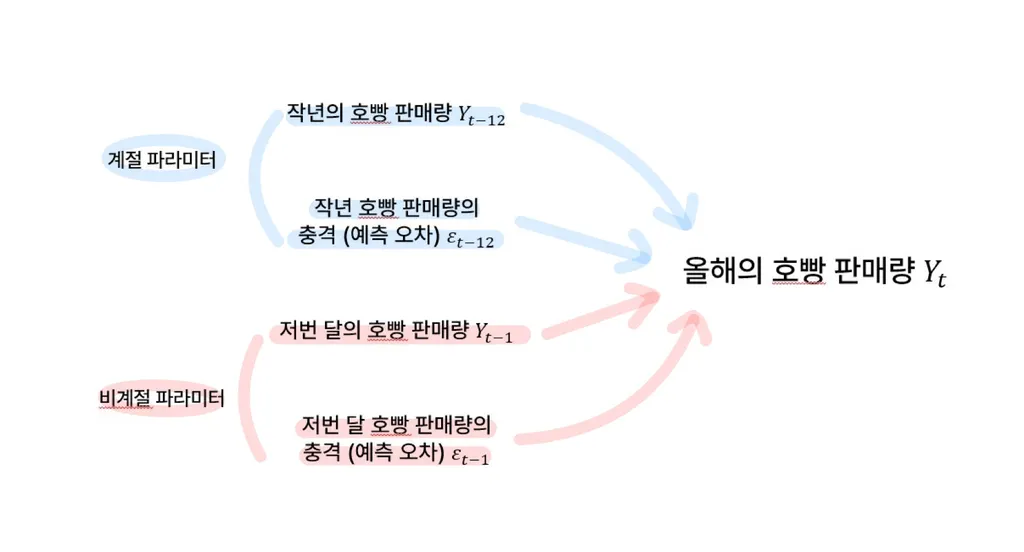
- 계절 ARIMA 파라미터 → $(P, D, Q)_{m} = (1, 1, 1)_{12}$
    - D = 1
        - 계절성 추세 제거 위해 **계절 차분 1번 진행**
        - $Y^*_t = Y_t - Y_{t-12}$
    - P = 1
        - **작년 (12개월 전)의 판매량($Y_{t-12}$)**이 올해 판매량($Y_t$)에 영향 O
    - Q = 1
        - **작년 (12개월 전)의 예측 오차($\varepsilon_{t-12}$)**가 올해 판매량($Y_t$)에 영향 O
- 비계절 ARIMA 파라미터 → $(p, d, q) = (1, 1,1)$
    - d = 1
        - 추세 제거 위해 1차 차분 진행
        - $Y'_t = Y_t - Y_{t-1}$
    - p = 1
        - **이전 달(1개월 전) 판매량**($Y_{t-1}$)이 올해 판매량($Y_t$)에 영향 O
    - q = 1
        - **이전 달(1개월 전) 예측 오차**($\varepsilon_{t-1}$)이 올해 판매량($Y_t$)에 영향 O
---
#### 계절성 데이터에서의 ACF와 PACF
- 계절 주기 m (ex.m=12)에서는, ACF에서 m의 배수 lag(ex.12,24,...)에서 급등하는 모습
- 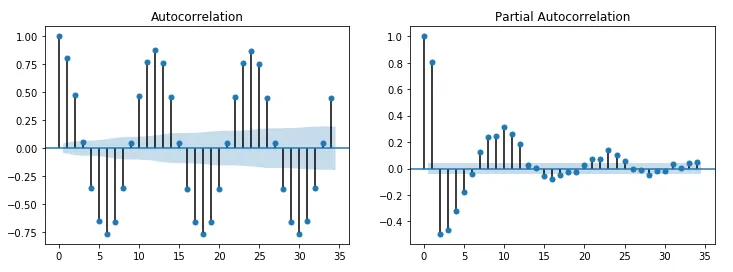
    - 12년 주기를 가지는 데이터의 ACF와 PACF 그래프
- 위 그래프를 살펴보면, 대략 12 시점을 기준으로 ACF(k)의 값이 급등하는 모습 발견 가능
- 이러한 계절성 추세 때문에 비계절성 추세 파악 어려움
- 계절성 차분을 먼저 수행하고, 비계절성 차분을 수행해줘야 함
---
#### 불안정 시계열에서의 하이퍼파라미터(p,q,d,D,..) 결정 방법
- 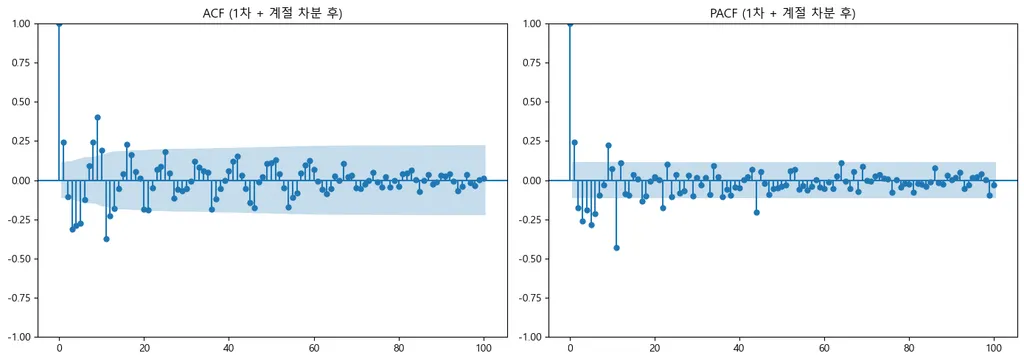
    - 실습 자료 속 비계절성 1차 차분(d=1)과 계절성 차분(D=1, m=11)을 마친 ACF와 PACF, 그럼에도 ACF와 PACF 값이 신뢰구간 밖으로 나온 시점이 많이 발견됩니다
- ACF와 PACF 그래프는 시각적으로 살펴보기 위한 도구일 뿐, 명확한 결과를 나타낼 떄는 많지 않다 -> 이런 상황에서는 아래 방법을 활용해 하이퍼파라미터를 결정!

##### 1. d, D(차분, 계절 차분) 결정
1. ADF(단위근 검정)으로 정상성 확보 여부 판단 후 결정
- 데이터가 정상성을 갖출 때 -> d,D(차분 정도) 결정
- 차분 정도는 대부분 0 or 1에서 결정됨
- 위 그래프 속 데이터는 데이터의 분포와 ADF 검정 결과를 고려하였을 때, d=1, D=1, s=11 로 설정함
##### 2. p,q(AR,MA 차수) 결정
1. 먼저 ACF, PACF로 범위를 추정한 뒤
- ACF, PACF 그래프를 보고 차수 결정하는 과정
- 위 그래프에서는 대략적으로 SARIMA(2, 1, 2)(1, 0, 1, 11)으로 설정
2. AIC, BIC 같은 정보 기준으로 그리드 서치 후, 최종 선택
- AIC, BIC는 모델 성능을 평가하는 지표로, 값이 낮을수록 모델이 성능이 좋음을 의미함
- 보통 p,q를 0~3 범위 내에서 그리드 서치 진행
- 위 그래프를 통해 설정한 p, q, P, Q에서 ±1 범위 내에서 AIC, BIC를 계산해주도록 하겠습니다! 

- 안정적 시계열 역시 ACF, PACF 그래프 만으로 차수 결정이 어렵다면, 위와 같은 방법을 수행함


# 2. 다변량 시계열 분석
## 1. VAR (Vector Autoregression)
- 핵심 아이디어: 자신의 과거 값과 다른 변수들의 과거 값을 함께 사용하여 미래를 예측하는 모델

1️⃣ 수식으로 이해하기:
- 단변량 AR(1)
$$
 X_t = a₁ X_{t-1} + ε_t
$$
-> X는 자기 자신의 과거만 사용
- 다변량 VAR(1)
$$
X_t = a_{11} X_{t-1} + a_{12} Y_{t-1} + ε_{x,t}
$$
$$
Y_t = a_{21} X_{t-1} + a_{22} Y_{t-1} + ε_{y,t}
$$
-> X와 Y가 서로의 과거를 함께 사용

2️⃣ 예시로 이해하기:

| AR 모형 | VAR 모형 |
| --- | --- |
| 2025년 GDP는 2024년 GDP로만 예측 | 2025년 GDP는 **2024년 GDP + 2024년 소비**로 예측 <br> 2025년 소비는 **2024년 소비 + 2024년 GDP**로 예측 |
| **단방향**: 자기 자신만 | **양방향**: 서로 영향을 주고받음 |

3️⃣ 어떤 경우에 추천하나요?
- ✅ 적합한 경우:
    - 여러 경제 지표가 서로 영향을 주고받는 경우 (GDP, 소비, 투자 등)
    - 금융 시장에서 여러 자산의 가격이 상호작용하는 경우
    - 변수 간 상호 의존성이 중요한 경우
- ❌ 부적합한 경우:
    - 변수가 너무 많은 경우 (파라미터 폭발)
    - 변수 간 관계가 명확하지 않은 경우
    - 장기 예측이 필요한 경우

- VAR에 사용할 변수는 그레인저 인과관계 검정을 통해 고름

### VAR 모델을 활용한 분석 방법

1️⃣ 충격 반응 함수 (IRF, Impulse-Response Function)
- 한 시계열에서 특정 시점에서 충격이 발생할 때, 다른 시계열에 시간에 따라 어떤 영향을 주는지 분석
- "A 변수에 외생적인 충격이 생기면, B 변수는 며칠 뒤에 얼마나, 어떤 방향으로 반응하는가?"
- ex. "소득(Y)에 충격이 발생했을 때, 소비(C) 변수는 며칠 뒤에 얼마나, 어떤 방향으로 충격이 나타날까?"

2️⃣ 예측오차 분산 분해 (Variance Decomposition)
- 어떤 시계열이 상대적으로 어떤 영향을 끼치고 있는지 중요도를 산출하기 위해서 진행
- 각 변수가 미래의 움직임을 예측하는 데에 어느 정도의 기여를 하는지 평가하는 방법
- "소비(C)의 미래값을 예측할 때 생기는 오차가 얼마나 소득(Y)의 충격 때문이고, 얼마나 저축(S)의 충격 때문인가?"

### VAR 모델 장단점
- ✅ 장점
    - 변수 간 양방향 영향 분석 가능
    - 도메인 지식 없어도 여러 변수를 함께 예측
    - 동시성 문제 없음 (과거값만 사용)
- ❌ 단점
    - 변수가 많으면 파라미터 폭발 (k개 변수 x p시차 -> k²p개 계수)
    - 장기적 관계 정보 손실 가능
    - 상관관계 ≠ 인과관계 (Granger 인과도 마찬가지)


# 3. 딥러닝을 활용한 시계열 분석
## 0. 등장 배경
- 전통 통계 모델의 한계
1. 데이터가 많으면 처리 속도가 느려짐
2. 크기가 고정된 데이터만 가능
3. 비선형 패턴 포착이 어려움

⇒ 딥러닝을 통해 해결해보자!

## 1. RNN 계열

### 1️⃣ RNN (Recurrent Neural Network)
- RNN: 이전 시점의 정보를 현재로 전달하는 순환 구조의 기본 신경망

✅ 적합한 경우:
- 짧은~중간 길이의 시계열 (10~100 시점)
- 순차적 의존성이 강한 데이터 (주가, 센서 데이터)
- 자기상관이 큰 데이터

❌ 부적합한 경우:
- 매우 긴 시계열 (장기 의존성 문제)
- 병렬 처리가 필요한 대규모 데이터

### 2️⃣ LSTM (Long Short-Term Memory)
- LSTM: 게이트 매커니즘으로 장기 기억을 유지할 수 있도록 개선한 RNN

✅ 적합한 경우:
- 장기 의존성이 중요한 경우 (100~1000 시점)
- 중요한 과거 이벤트가 먼 미래에 영향을 주는 경우
- 예: 분기별 재무제표로 연간 실적 예측

### 3️⃣ GRU (Gated Recurrent Unit)
- GRU: LSTM을 단순화하여 더 빠르게 학습하면서도 비슷한 성능을 내는 모델

✅ 적합한 경우:
- LSTM처럼 장기 의존성이 필요하지만, 학습 속도가 중요한 경우
- 데이터가 상대적으로 적을 때 (파라미터가 적어 과적합 위험 낮음)
- 실시간 처리가 필요한 경우

## 2. Transformer 계열

### 1️⃣ Transformer
- Transformer: 어텐션 메커니즘으로 모든 시점을 동시에 참조해 병렬 처리하는 모델

✅ 적합한 경우:
- 매우 긴 시계열 (1000+ 시점)
- 전역 패턴이 중요한 경우 (연간 계절성, 장기 트렌드)
- 대규모 데이터 (병렬 연산 활용)
- 다변량 시계열 (변수 간 상호작용 학습)

❌ 부적합한 경우:
- 짧은 시계열 (과적합 위험)
- 계산 자원이 제한된 경우

사용 예시:
- 전력 수요 예측 (1년 시간별 데이터 -> 다음 주 예측)
- 주식 포트폴리오 예측 (여러 종목 간 상호작용)

Transformer 계열 모델 상세

| 모델 | 언제 사용? | 사용 예시 | 장점 | 단점 |
| --- | --- | --- | --- | --- |
| **Vanilla Transformer** | 짧은 시계열 | 30일 주가 예측 | 구조 단순 | 긴 시계열 처리 어려움 |
| **Informer** | 긴 시계열 | 전력 수요 예측 | 계산 효율적 | 짧은 시계열 과적합 |
| **Autoformer** | 주기성 뚜렷 | 월별 판매량 예측 | 주기 포착 우수 | 구조 복잡 |
| **TFT** | 외생 변수 많음 | 유통 수요 예측 | 해석 가능 | 학습 시간 오래 걸림 |

## 3. Foundation Model

### 0️⃣ Foundation Model이란?
- 거대한 데이터로 사전 학습하여 다양한 문제를 해결할 수 있는 범용 모델

비유로 이해하기:
- 건물 짓기: 튼튼한 기초 공사 = Foundation Model
- AI: 넓고 깊은 지식을 담은 모델 -> 특정 작업에 빠르게 적응

특징:
- 특정 문제 적용 X
- 범용적 (Generalized)
- 사전 학습 후 Fine-tuning으로 특화

### 1️⃣ LLM 기반 모델
- 대규모 언어 모델의 패턴 인식 능력을 시계열에 활용하는 접근법

Without Adaptation
- LLM이 이미 시계열 지식을 가지고 있다고 가정
- 프롬프트 엔지니어링에 집중
- 예: "과거 10일 데이터: [1,2,3...]. 다음 값은?"

Adapt LLM
- LLM을 시계열 데이터로 Fine-tuning
- 일부 레이어만 학습 or 전체 Fine-tuning

Adapt to LLM
- 시계열을 텍스트로 변환 후 LLM 활용
- 예: 숫자 시계열 -> "값이 증가 추세", "주기성 있음" 등 텍스트화

### 2️⃣ 자체 거대 모델
- 대규모 시계열 데이터로 사전 학습하여 다양한 예측 문제에 범용적으로 적용 가능한 모델

- 시계열 전용으로 처음부터 학습
- 대규모 시계열 데이터 수집이 핵심
- 예: TimeGPT, TimesFM, Moirai

## 4. 딥러닝 모델 선택 가이드
### 핵심 트레이드오프
- 단순함 vs 성능: RNN < LSTM/GRU < Transformer
- 해석 가능 vs 정확도: 통계 모델 > 딥러닝 (단, TFT는 어텐션으로 해석 가능)
- 학습 시간 vs 예측 성능: 간단한 모델은 빠르고, 복잡한 모델은 정확함
- 데이터 크기: 적으면 통계 모델/RNN, 많으면 Transformer

### 상황별 추천 모델

| 상황 | 추천 모델 | 이유 |
| --- | --- | --- |
| 짧은 시계열 (< 100) | 통계 모델, RNN | 데이터가 적으면 단순한 모델이 과적합 방지에 유리 |
| 중간 길이 (100~1000) | LSTM, GRU | 장기 의존성 학습 가능, 적절한 복잡도 |
| 매우 긴 시계열 (1000+) | Informer, Autoformer | 긴 시퀀스의 전역 패턴 효율적 학습 |
| 장기 의존성 중요 | LSTM, Transformer | GRU보다 먼 과거 정보 유지에 강함 |
| 주기 패턴 뚜렷 | Autoformer | 추세/계절성 분해로 주기 포착 우수 |
| 외생 변수 많음 | TFT | 정적/동적 변수 융합 + 해석 가능 |
| 대규모 데이터 | Transformer 계열 | 병렬 연산으로 학습 효율적 |
| 범용 예측 필요 | Foundation Model | 사전 학습된 지식으로 빠른 적용 |

### 참고 사항
- 데이터가 적을 때는 딥러닝보다 통계 모델(ARIMA 등)이 더 효과적일 수 있음
- GRU는 LSTM보다 빠르지만, 장기 의존성 학습은 LSTM이 우세
- 해석이 중요한 비즈니스 문제에는 TFT 고려